# Question 3: Loan Application Modeling

### Classification used
`1. Naive Bayes`

`2. Decision Tree Classifier`

### Cluster Analysis
`K-means`



### Load Libraries

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

#use seaborn plotting defaults
import seaborn as sns

#load machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score

#load KMeans
from sklearn.cluster import KMeans

#warnings
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
# read csv

df = pd.read_csv('Bank_CreditScoring.csv')
#check data
df.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,456509,16,yes,1,2,5,2,2,...,1,condominium,10,Johor,2,12262,853141,16025,Reject,7
1,1,employer,605505,19,no,1,2,5,2,2,...,2,condominium,10,Johor,2,9251,882901,17082,Accept,9
2,1,employer,294133,19,yes,1,2,5,2,2,...,3,condominium,10,Johor,2,4919,540489,12613,Reject,8
3,1,employer,490216,20,no,1,2,5,2,2,...,1,condominium,10,Johor,1,4459,536727,10952,Accept,9
4,1,employer,292728,14,yes,1,2,5,2,2,...,2,condominium,10,Johor,3,5628,774695,11209,Reject,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Credit_Card_Exceed_Months          2350 non-null   int64 
 1   Employment_Type                    2350 non-null   object
 2   Loan_Amount                        2350 non-null   int64 
 3   Loan_Tenure_Year                   2350 non-null   int64 
 4   More_Than_One_Products             2350 non-null   object
 5   Credit_Card_More_Than_Months       2350 non-null   int64 
 6   Number_of_Dependents               2350 non-null   int64 
 7   Years_to_Financial_Freedom         2350 non-null   int64 
 8   Number_of_Credit_Card_Facility     2350 non-null   int64 
 9   Number_of_Properties               2350 non-null   int64 
 10  Number_of_Bank_Products            2350 non-null   int64 
 11  Number_of_Loan_to_Approve          2350 non-null   int64 
 12  Proper

### Preparing the data for model training

Before we train the model, we need to prepare the data by doing a few things:
* Are there any rows with null values?
* Are there any attributes that are categorical? If yes, and if we are planning to use it to train the model, we ought to convert it to discrete numerical values.
* Separate out the descriptor (features) and the response (label) data.

In [4]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]
sample_incomplete_rows
#no null values

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score


In [5]:
df.dtypes

Credit_Card_Exceed_Months             int64
Employment_Type                      object
Loan_Amount                           int64
Loan_Tenure_Year                      int64
More_Than_One_Products               object
Credit_Card_More_Than_Months          int64
Number_of_Dependents                  int64
Years_to_Financial_Freedom            int64
Number_of_Credit_Card_Facility        int64
Number_of_Properties                  int64
Number_of_Bank_Products               int64
Number_of_Loan_to_Approve             int64
Property_Type                        object
Years_for_Property_to_Completion      int64
State                                object
Number_of_Side_Income                 int64
Monthly_Salary                        int64
Total_Sum_of_Loan                     int64
Total_Income_for_Join_Application     int64
Decision                             object
Score                                 int64
dtype: object

In [6]:
df.State.unique()

array(['Johor', 'Selangor', 'Kuala Lumpur', 'Penang', 'P.Pinang',
       'Pulau Penang', 'Johor B', 'K.L', 'N.Sembilan', 'N.S', 'Sarawak',
       'Sabah', 'SWK', 'Trengganu', 'Kedah'], dtype=object)

Noticed that some states are the same but spelled differently, therefore replace them correctly into the DataFrame

In [7]:
df['State'] = df['State'].replace(['Johor B'],'Johor')
df['State'] = df['State'].replace(['K.L'],'Kuala Lumpur')
df['State'] = df['State'].replace(['Trengganu'],'Terengganu')
df['State'] = df['State'].replace(['SWK'],'Sarawak')
df['State'] = df['State'].replace(['N.S'],'N.Sembilan')
df['State'] = df['State'].replace(['P.Pinang', 'Pulau Penang'],'Penang')

In [8]:
df.State.unique()

array(['Johor', 'Selangor', 'Kuala Lumpur', 'Penang', 'N.Sembilan',
       'Sarawak', 'Sabah', 'Terengganu', 'Kedah'], dtype=object)

### Check Descriptive Statistics

In [9]:
df.describe()

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Score
count,2350.000000,2350.000000,2350.000000,2350.00000,2350.00000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000,2350.000000
mean,4.723404,448350.120851,17.053191,2.12766,3.12766,13.382979,3.744681,2.382979,2.106383,1.991915,10.659574,2.020426,7972.040000,9.435756e+05,13767.859574,7.496596
std,2.101127,202814.886797,4.352123,1.40874,1.40874,4.067090,1.391271,0.813707,1.533423,0.816717,1.077590,0.818325,2588.330436,2.909033e+05,3591.707735,1.112542
min,1.000000,100194.000000,10.000000,1.00000,2.00000,5.000000,2.000000,2.000000,1.000000,1.000000,10.000000,1.000000,3583.000000,4.202390e+05,7523.000000,6.000000
25%,3.000000,273169.250000,13.000000,1.00000,2.00000,10.000000,2.000000,2.000000,1.000000,1.000000,10.000000,1.000000,5737.750000,7.007870e+05,10751.500000,6.000000
50%,5.000000,447251.500000,17.000000,1.00000,2.00000,14.000000,4.000000,2.000000,1.000000,2.000000,10.000000,2.000000,7982.500000,9.375275e+05,13689.500000,8.000000
75%,7.000000,623714.000000,21.000000,3.00000,4.00000,17.000000,5.000000,2.000000,3.000000,3.000000,11.000000,3.000000,10227.750000,1.197191e+06,16916.250000,8.000000
max,7.000000,799628.000000,24.000000,5.00000,6.00000,19.000000,6.000000,5.000000,5.000000,3.000000,13.000000,3.000000,12562.000000,1.449960e+06,19995.000000,9.000000


### Pair Graph

The purpose of creating a pair graph is to give an idea on what to compare in the model later down the road. And also to analyse the different cases

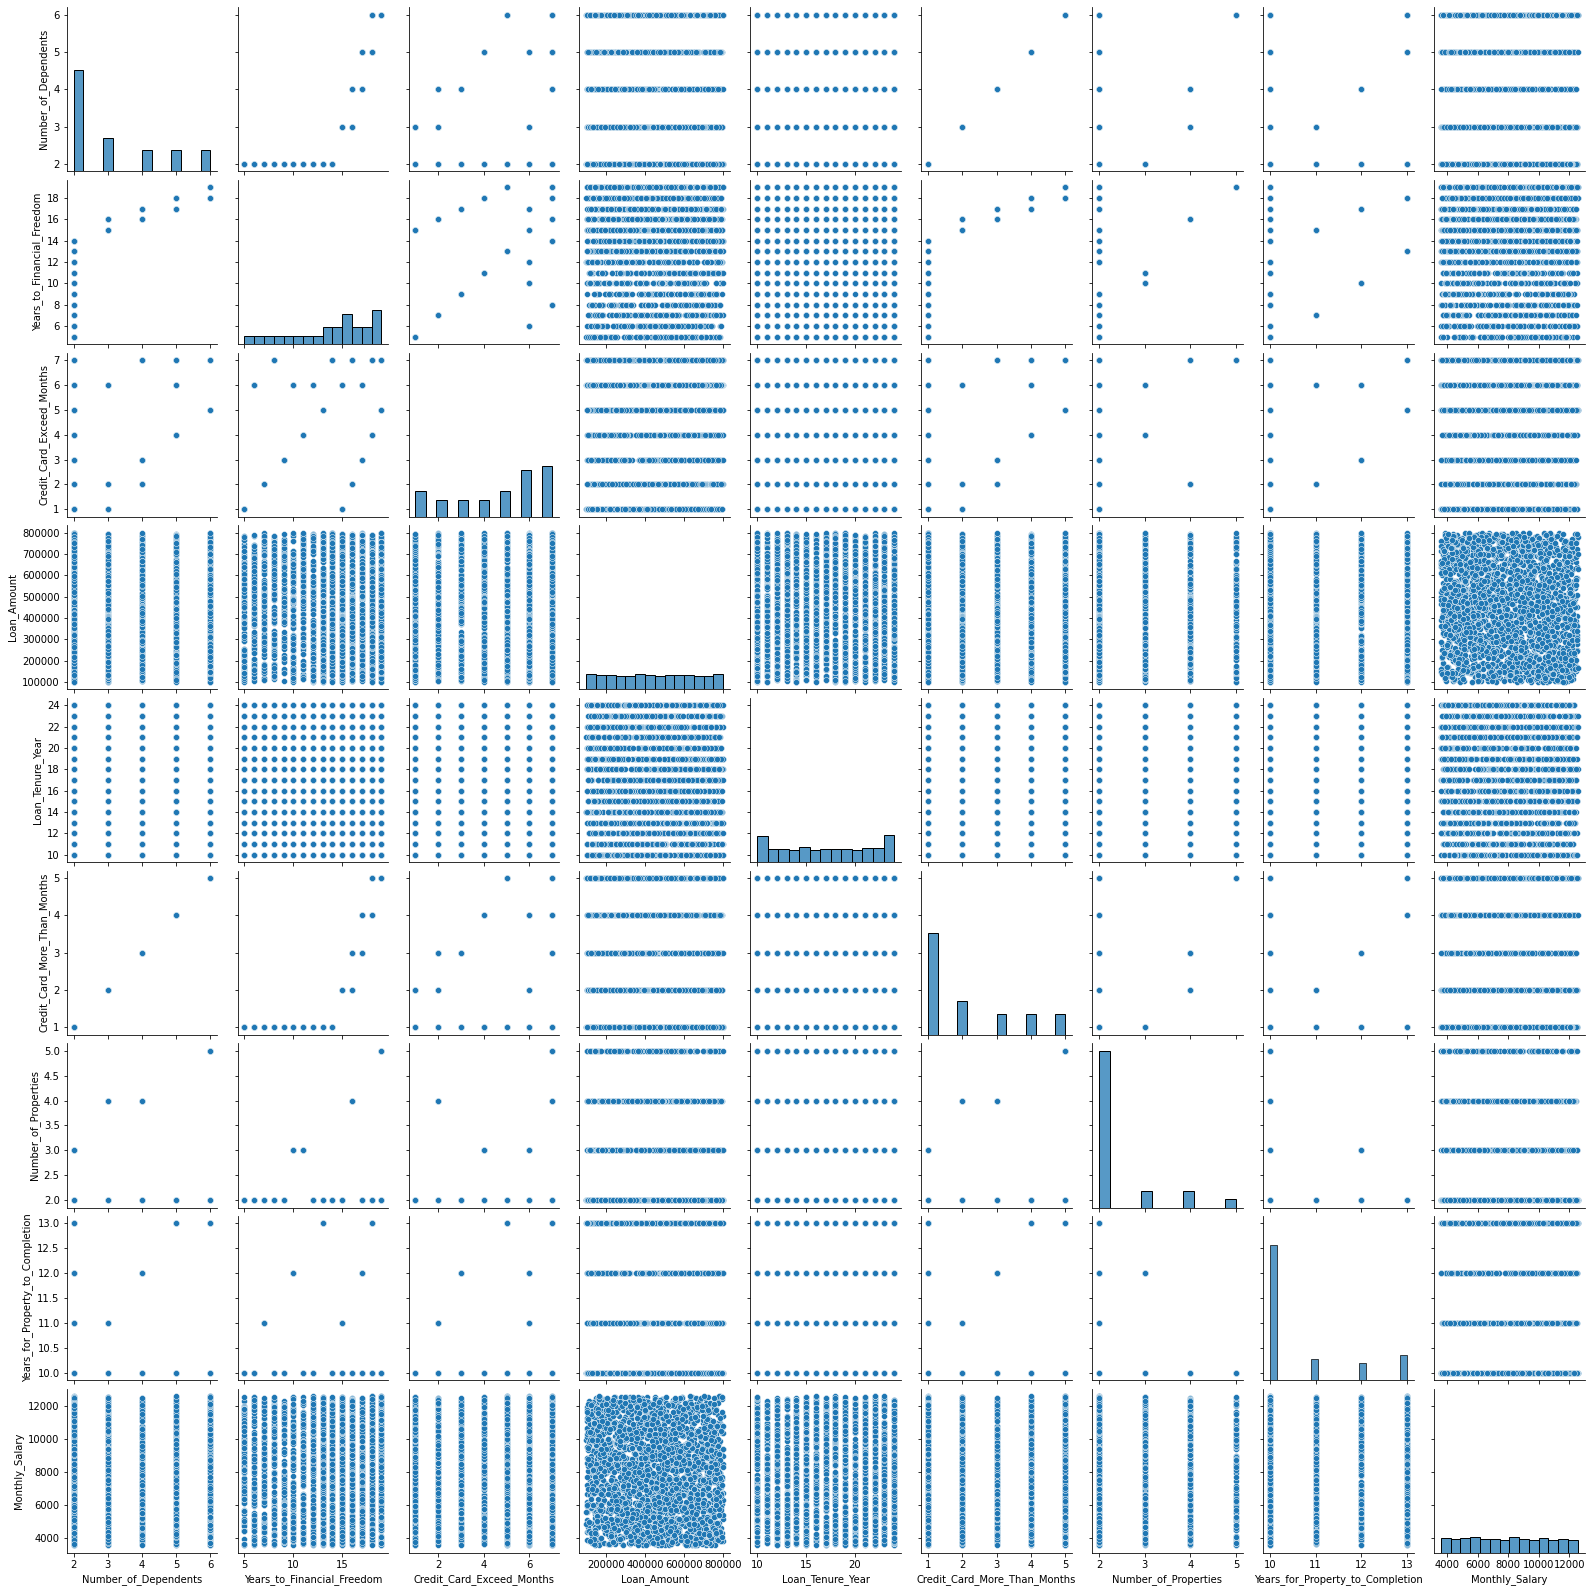

In [10]:
sns.pairplot(df[['Number_of_Dependents', 'Years_to_Financial_Freedom','Credit_Card_Exceed_Months','Loan_Amount',
                'Loan_Tenure_Year','Credit_Card_More_Than_Months','Number_of_Properties','Years_for_Property_to_Completion',
                'Monthly_Salary']])

### Findings
Based on the plotted pair graph above, we can see some relationships between the variables. 

* For example, 'Number_of_Dependents' and 'Years_to_Financial_Freedom'. The graph shows the higher the dependency, the longer it take for a person to have financial freedom.

* Other than that, the graph 'Number_of_Properties' and 'Years_to_Financial_Freedom' shows that as the number of property increases, the years it takes to be financially free also increases.

* Next, the graph 'Number_of_Dependents' and 'Credit_Card_Exceed_Months' shows that as the number of dependents increases, the more likely the person exceeded their credit

### Perform K-Mean Clustering

Based on the pair plot above, we are finding clusters on Number of dependencies and Financial freedom

Before performing k mean we need to identify the perfect K value using elbow method


In [11]:
feature_cols = ['Number_of_Dependents', 'Years_to_Financial_Freedom']
X = df[feature_cols]
y = df['Score']
X


,Number_of_Dependents,Years_to_Financial_Freedom
0,2,5
1,2,5
2,2,5
3,2,5
4,2,5
...,...,...
2345,3,15
2346,3,15
2347,3,15
2348,3,15


<function matplotlib.pyplot.show(close=None, block=None)>

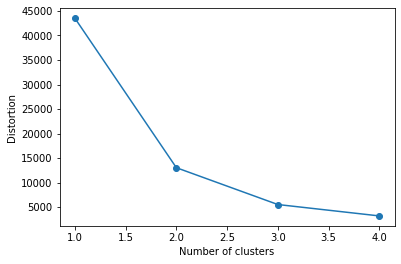

In [12]:
distortions = []
for i in range(1,5):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

#plot
plt.plot(range(1,5), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show

In [13]:
import sklearn.cluster as cluster

km = cluster.KMeans(n_clusters=3, init='k-means++')
km = km.fit(X)

km.cluster_centers_

array([[ 2.4 , 13.75],
       [ 5.  , 17.6 ],
       [ 2.  ,  7.5 ]])

### Save Center point into .csv

In [14]:
def transData(k):
    if k == 2:
        # read csv file
        df = pd.read_csv("Center_PointK2.csv")
        # updating the column value/data
        df.at[0, 'X-Axis'] = km.cluster_centers_[0][0]
        df.at[0, 'Y-Axis'] = km.cluster_centers_[0][1]
        df.at[1, 'X-Axis'] = km.cluster_centers_[1][0]
        df.at[1, 'Y-Axis'] = km.cluster_centers_[1][1]
        # writing into the file
        df.to_csv("Center_PointK2.csv", index=False)

    if k == 3:
        # read csv file
        df = pd.read_csv("Center_PointK3.csv")
        # updating the column value/data
        df.at[0, 'X-Axis'] = km.cluster_centers_[0][0]
        df.at[0, 'Y-Axis'] = km.cluster_centers_[0][1]
        df.at[1, 'X-Axis'] = km.cluster_centers_[1][0]
        df.at[1, 'Y-Axis'] = km.cluster_centers_[1][1]
        df.at[2, 'X-Axis'] = km.cluster_centers_[2][0]
        df.at[2, 'Y-Axis'] = km.cluster_centers_[2][1]
        # writing into the file
        df.to_csv("Center_PointK3.csv", index=False)

    if k == 4:
        # read csv file
        df = pd.read_csv("Center_PointK4.csv")  
        # updating the column value/data
        df.at[0, 'X-Axis'] = km.cluster_centers_[0][0]
        df.at[0, 'Y-Axis'] = km.cluster_centers_[0][1]
        df.at[1, 'X-Axis'] = km.cluster_centers_[1][0]
        df.at[1, 'Y-Axis'] = km.cluster_centers_[1][1]
        df.at[2, 'X-Axis'] = km.cluster_centers_[2][0]
        df.at[2, 'Y-Axis'] = km.cluster_centers_[2][1]
        df.at[3, 'X-Axis'] = km.cluster_centers_[3][0]
        df.at[3, 'Y-Axis'] = km.cluster_centers_[3][1]
        # writing into the file
        df.to_csv("Center_PointK4.csv", index=False)

In [15]:
transData(3)

attach clusters to the df

In [16]:
df['clusters'] = km.labels_
df

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score,clusters
0,1,employer,456509,16,yes,1,2,5,2,2,...,condominium,10,Johor,2,12262,853141,16025,Reject,7,2
1,1,employer,605505,19,no,1,2,5,2,2,...,condominium,10,Johor,2,9251,882901,17082,Accept,9,2
2,1,employer,294133,19,yes,1,2,5,2,2,...,condominium,10,Johor,2,4919,540489,12613,Reject,8,2
3,1,employer,490216,20,no,1,2,5,2,2,...,condominium,10,Johor,1,4459,536727,10952,Accept,9,2
4,1,employer,292728,14,yes,1,2,5,2,2,...,condominium,10,Johor,3,5628,774695,11209,Reject,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,Fresh_Graduate,339461,15,no,2,3,15,2,2,...,terrace,11,Kuala Lumpur,1,10895,1388015,15256,Reject,7,0
2346,6,Fresh_Graduate,690944,13,yes,2,3,15,2,2,...,terrace,11,Kuala Lumpur,3,11971,1147984,11842,Accept,7,0
2347,6,Fresh_Graduate,321921,13,no,2,3,15,2,2,...,terrace,11,Kuala Lumpur,1,4175,685580,16619,Accept,7,0
2348,6,Fresh_Graduate,393555,14,yes,2,3,15,2,2,...,terrace,11,Kuala Lumpur,2,5011,673748,13892,Reject,7,0


### Plot Cluster on Chart

<AxesSubplot:xlabel='Number_of_Dependents', ylabel='Years_to_Financial_Freedom'>

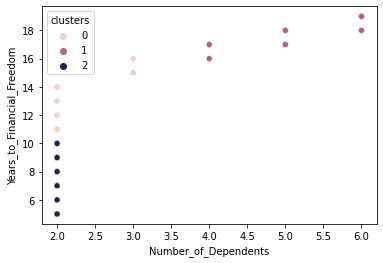

In [17]:
sns.scatterplot(x='Number_of_Dependents',y='Years_to_Financial_Freedom', hue='clusters', data=df)

### Get cluster value

In [18]:
df['clusters'].value_counts()

0    1000
1     750
2     600
Name: clusters, dtype: int64

### `Findings based on cluster`

* As you can see from the graph, we can say that the majority of people will take more than 10 years to be financially free.
* We can also see that (from cluster 1) as the number of dependents increase, people are more likely to be financially free a bit late from others that have less number of dependents
* Lastly we can see from the final cluster (cluster 2), they have low number of dependents. Therefore the amount it takes to be financially free also reduce.

### `Conclusion`
* The more number of dependents you have, the longer it takes for someone to be financially free.

## Naive Bayes Classifier

Before splitting and train the data, we need to comvert some of the data to be numeric. We can use `LabelEncoder` but instead we'll just manually add the number

In [19]:
from sklearn.preprocessing import LabelEncoder

### Conversion of 'Decision'

Accept = 0
Reject = 1

In [20]:
df['Decision'] = df['Decision'].replace(['Accept'], 0)
df['Decision'] = df['Decision'].replace(['Reject'], 1)
df

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score,clusters
0,1,employer,456509,16,yes,1,2,5,2,2,...,condominium,10,Johor,2,12262,853141,16025,1,7,2
1,1,employer,605505,19,no,1,2,5,2,2,...,condominium,10,Johor,2,9251,882901,17082,0,9,2
2,1,employer,294133,19,yes,1,2,5,2,2,...,condominium,10,Johor,2,4919,540489,12613,1,8,2
3,1,employer,490216,20,no,1,2,5,2,2,...,condominium,10,Johor,1,4459,536727,10952,0,9,2
4,1,employer,292728,14,yes,1,2,5,2,2,...,condominium,10,Johor,3,5628,774695,11209,1,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,Fresh_Graduate,339461,15,no,2,3,15,2,2,...,terrace,11,Kuala Lumpur,1,10895,1388015,15256,1,7,0
2346,6,Fresh_Graduate,690944,13,yes,2,3,15,2,2,...,terrace,11,Kuala Lumpur,3,11971,1147984,11842,0,7,0
2347,6,Fresh_Graduate,321921,13,no,2,3,15,2,2,...,terrace,11,Kuala Lumpur,1,4175,685580,16619,0,7,0
2348,6,Fresh_Graduate,393555,14,yes,2,3,15,2,2,...,terrace,11,Kuala Lumpur,2,5011,673748,13892,1,7,0


### Conversion of State


In [21]:
df.State.unique()

array(['Johor', 'Selangor', 'Kuala Lumpur', 'Penang', 'N.Sembilan',
       'Sarawak', 'Sabah', 'Terengganu', 'Kedah'], dtype=object)

Johor = 1
Selangor = 2
Kuala Lumpur = 3
Penang = 4
N.Sembilan = 5
Sarawak = 6
Sabah = 7
Terengganu = 8
Kedah = 9

In [22]:
df['State'] = df['State'].replace(['Johor'],1)
df['State'] = df['State'].replace(['Selangor'],2)
df['State'] = df['State'].replace(['Kuala Lumpur'],3)
df['State'] = df['State'].replace(['Penang'],4)
df['State'] = df['State'].replace(['N.Sembilan'],5)
df['State'] = df['State'].replace(['Sarawak'],6)
df['State'] = df['State'].replace(['Sabah'],7)
df['State'] = df['State'].replace(['Terengganu'],8)
df['State'] = df['State'].replace(['Kedah'],9)
df.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score,clusters
0,1,employer,456509,16,yes,1,2,5,2,2,...,condominium,10,1,2,12262,853141,16025,1,7,2
1,1,employer,605505,19,no,1,2,5,2,2,...,condominium,10,1,2,9251,882901,17082,0,9,2
2,1,employer,294133,19,yes,1,2,5,2,2,...,condominium,10,1,2,4919,540489,12613,1,8,2
3,1,employer,490216,20,no,1,2,5,2,2,...,condominium,10,1,1,4459,536727,10952,0,9,2
4,1,employer,292728,14,yes,1,2,5,2,2,...,condominium,10,1,3,5628,774695,11209,1,8,2


### Conversion of Property_Type

In [23]:
df.Property_Type.unique()

array(['condominium', 'bungalow', 'terrace', 'flat'], dtype=object)

condominium = 1
bungalow = 2
terrace = 3
flat = 4

In [24]:
df['Property_Type'] = df['Property_Type'].replace(['condominium'],1)
df['Property_Type'] = df['Property_Type'].replace(['bungalow'],2)
df['Property_Type'] = df['Property_Type'].replace(['terrace'],3)
df['Property_Type'] = df['Property_Type'].replace(['flat'],4)
df.Property_Type.unique()

array([1, 2, 3, 4], dtype=int64)

### Conversion of More_Than_One_Products

In [25]:
df.More_Than_One_Products.unique()

array(['yes', 'no'], dtype=object)

yes = 1
no = 0

In [26]:
df['More_Than_One_Products'] = df['More_Than_One_Products'].replace(['yes'],1)
df['More_Than_One_Products'] = df['More_Than_One_Products'].replace(['no'],2)
df.More_Than_One_Products.unique()

array([1, 2], dtype=int64)

### Conversion of Employment_Type

In [27]:
df.Employment_Type.unique()

array(['employer', 'Self_Employed', 'government', 'employee',
       'Fresh_Graduate'], dtype=object)

employer = 1
Self_Employed = 2
government = 3
employee = 4
Fresh_Graduate = 5

In [28]:
df['Employment_Type'] = df['Employment_Type'].replace(['employer'],1)
df['Employment_Type'] = df['Employment_Type'].replace(['Self_Employed'],2)
df['Employment_Type'] = df['Employment_Type'].replace(['government'],3)
df['Employment_Type'] = df['Employment_Type'].replace(['employee'],4)
df['Employment_Type'] = df['Employment_Type'].replace(['Fresh_Graduate'],5)
df

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score,clusters
0,1,1,456509,16,1,1,2,5,2,2,...,1,10,1,2,12262,853141,16025,1,7,2
1,1,1,605505,19,2,1,2,5,2,2,...,1,10,1,2,9251,882901,17082,0,9,2
2,1,1,294133,19,1,1,2,5,2,2,...,1,10,1,2,4919,540489,12613,1,8,2
3,1,1,490216,20,2,1,2,5,2,2,...,1,10,1,1,4459,536727,10952,0,9,2
4,1,1,292728,14,1,1,2,5,2,2,...,1,10,1,3,5628,774695,11209,1,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,5,339461,15,2,2,3,15,2,2,...,3,11,3,1,10895,1388015,15256,1,7,0
2346,6,5,690944,13,1,2,3,15,2,2,...,3,11,3,3,11971,1147984,11842,0,7,0
2347,6,5,321921,13,2,2,3,15,2,2,...,3,11,3,1,4175,685580,16619,0,7,0
2348,6,5,393555,14,1,2,3,15,2,2,...,3,11,3,2,5011,673748,13892,1,7,0


### Seperate data into X and y using 70/30 ratio. 

70% for training data while 30% for test

in this case, `X` represent all the independant variable in the dataframe

`y` represent the dependant variable. In this case, the variable 'Decision'

In [29]:
df.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score,clusters
0,1,1,456509,16,1,1,2,5,2,2,...,1,10,1,2,12262,853141,16025,1,7,2
1,1,1,605505,19,2,1,2,5,2,2,...,1,10,1,2,9251,882901,17082,0,9,2
2,1,1,294133,19,1,1,2,5,2,2,...,1,10,1,2,4919,540489,12613,1,8,2
3,1,1,490216,20,2,1,2,5,2,2,...,1,10,1,1,4459,536727,10952,0,9,2
4,1,1,292728,14,1,1,2,5,2,2,...,1,10,1,3,5628,774695,11209,1,8,2


In [30]:
feature_cols = ['Number_of_Dependents', 'Credit_Card_Exceed_Months']
X = df[feature_cols]
y = df.Years_to_Financial_Freedom

# X = df.drop('Decision', axis=1)
# y = df.Decision

### Seperate Data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Perform Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

compute score


In [33]:
nb.score(X_train, y_train)

0.7082066869300911

### Perform Prediction

In [34]:
y_pred = nb.predict(X_test)
y_pred

array([11, 10, 17, 19, 18, 16, 13, 10, 15,  7, 15, 10, 16, 18, 17, 11, 16,
       15, 17, 19, 10, 19,  9, 14, 10,  5, 17, 10, 19, 10, 15, 15, 16, 14,
       15, 15, 15, 14, 15,  9,  5, 18, 16, 19, 17, 13, 18, 13, 15, 10, 10,
       14, 19, 13, 11,  5, 15, 14, 19, 19,  5, 15, 19, 18, 15, 11, 15, 18,
       10, 15, 15, 15, 16, 10, 15, 15, 10, 14, 11, 18, 17, 16, 13, 11, 15,
       13, 15, 14, 16, 14, 15, 16, 18, 15, 18,  7, 19, 18, 13,  7, 18, 14,
       15, 15, 15, 15, 16, 11, 15, 16, 11, 15,  5, 19,  5, 10, 16, 10, 14,
       17, 15, 15, 15, 19, 17,  5, 19, 14, 15, 19, 10, 18, 13, 19, 10, 13,
       10,  7, 17, 19, 18, 13, 15, 17, 16, 19, 13, 10, 18, 19, 13,  7, 14,
       15, 10, 19, 15, 18, 15,  7, 17,  7, 15, 15, 18, 10, 14, 19,  7, 15,
       16,  5, 16, 11, 15, 10, 13, 10, 10, 19, 19,  7, 10, 14, 19, 15, 16,
       14, 19, 14, 15, 19, 16, 13, 15, 10, 15, 15, 18, 19, 19, 14, 15, 10,
       10, 14, 11, 14, 10, 16, 18, 17, 14, 14, 14, 14, 15, 19, 19,  7, 15,
       15, 15, 14, 16, 13

In [35]:
y_train.value_counts()

15    247
14    145
13    143
17    141
19    138
18    137
16    135
9      79
10     72
8      72
7      70
12     68
11     68
6      67
5      63
Name: Years_to_Financial_Freedom, dtype: int64

### Compare prediction vs actual value

In [36]:
some_data = X_test.iloc[:300]
pred_freedom = nb.predict(some_data)
pred_freedom

array([11, 10, 17, 19, 18, 16, 13, 10, 15,  7, 15, 10, 16, 18, 17, 11, 16,
       15, 17, 19, 10, 19,  9, 14, 10,  5, 17, 10, 19, 10, 15, 15, 16, 14,
       15, 15, 15, 14, 15,  9,  5, 18, 16, 19, 17, 13, 18, 13, 15, 10, 10,
       14, 19, 13, 11,  5, 15, 14, 19, 19,  5, 15, 19, 18, 15, 11, 15, 18,
       10, 15, 15, 15, 16, 10, 15, 15, 10, 14, 11, 18, 17, 16, 13, 11, 15,
       13, 15, 14, 16, 14, 15, 16, 18, 15, 18,  7, 19, 18, 13,  7, 18, 14,
       15, 15, 15, 15, 16, 11, 15, 16, 11, 15,  5, 19,  5, 10, 16, 10, 14,
       17, 15, 15, 15, 19, 17,  5, 19, 14, 15, 19, 10, 18, 13, 19, 10, 13,
       10,  7, 17, 19, 18, 13, 15, 17, 16, 19, 13, 10, 18, 19, 13,  7, 14,
       15, 10, 19, 15, 18, 15,  7, 17,  7, 15, 15, 18, 10, 14, 19,  7, 15,
       16,  5, 16, 11, 15, 10, 13, 10, 10, 19, 19,  7, 10, 14, 19, 15, 16,
       14, 19, 14, 15, 19, 16, 13, 15, 10, 15, 15, 18, 19, 19, 14, 15, 10,
       10, 14, 11, 14, 10, 16, 18, 17, 14, 14, 14, 14, 15, 19, 19,  7, 15,
       15, 15, 14, 16, 13

In [37]:
actual_freedom = y_test.iloc[:300].values
actual_freedom

array([11, 12, 18, 19, 18, 16, 13, 12, 15,  7, 16, 10, 16, 17, 18, 11, 16,
       15, 18, 19,  6, 19,  9,  8, 10,  5, 18, 12, 19,  6, 15, 15, 17, 14,
       16, 15, 15, 14, 16,  9,  5, 17, 17, 19, 18, 13, 18, 13, 15, 10,  6,
       14, 19, 13, 11,  5, 15, 14, 19, 19,  5, 15, 19, 18, 16, 11, 16, 17,
        6, 15, 15, 15, 16, 10, 15, 15, 10, 14, 11, 17, 18, 16, 13, 11, 16,
       13, 15, 14, 16,  8, 15, 16, 17, 16, 17,  7, 19, 17, 13,  7, 17, 14,
       15, 15, 15, 16, 16, 11, 15, 16, 11, 15,  5, 19,  5, 10, 17, 12, 14,
       18, 15, 15, 15, 19, 18,  5, 19, 14, 15, 19,  6, 18, 13, 18,  6, 13,
       12,  7, 18, 18, 17, 13, 15, 18, 17, 19, 13, 12, 18, 19, 13,  7, 14,
       15,  6, 19, 16, 17, 15,  7, 18,  7, 15, 15, 17,  6, 14, 19,  7, 15,
       16,  5, 17, 11, 15, 12, 13,  6, 10, 19, 18,  7, 12, 14, 19, 15, 17,
        8, 18, 14, 15, 18, 16, 13, 15, 10, 16, 15, 17, 19, 19, 14, 15,  6,
       12, 14, 11, 14, 10, 17, 18, 18,  8,  8, 14, 14, 15, 19, 19,  7, 16,
       15, 15, 14, 16, 13

### Save predicted output in a different dataframe and save into csv

In [38]:
cols = ['Number_of_Dependents', 'Credit_Card_Exceed_Months','Years_to_Financial_Freedom']
new_df = df[cols].iloc[:300]
new_df['Years_to_Financial_Freedom_pred'] = pred_freedom
new_df['Years_to_Financial_Freedom'] = actual_freedom

new_df.columns = ['No. of Dependents', 'Credit Card Exceed Months','Years to Financial Freedom','Predicted Years to Financial Freedom']
new_df.to_csv('Naive_bayes_results.csv', index=False)

In [39]:
new_df

,No. of Dependents,Credit Card Exceed Months,Years to Financial Freedom,Predicted Years to Financial Freedom
0,2,1,11,11
1,2,1,12,10
2,2,1,18,17
3,2,1,19,19
4,2,1,18,18
...,...,...,...,...
295,2,2,17,16
296,2,2,13,13
297,2,2,15,15
298,2,2,19,19


## Decision Tree

In [40]:
#Load relevant libraries
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn import tree

In [41]:
df

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score,clusters
0,1,1,456509,16,1,1,2,5,2,2,...,1,10,1,2,12262,853141,16025,1,7,2
1,1,1,605505,19,2,1,2,5,2,2,...,1,10,1,2,9251,882901,17082,0,9,2
2,1,1,294133,19,1,1,2,5,2,2,...,1,10,1,2,4919,540489,12613,1,8,2
3,1,1,490216,20,2,1,2,5,2,2,...,1,10,1,1,4459,536727,10952,0,9,2
4,1,1,292728,14,1,1,2,5,2,2,...,1,10,1,3,5628,774695,11209,1,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,5,339461,15,2,2,3,15,2,2,...,3,11,3,1,10895,1388015,15256,1,7,0
2346,6,5,690944,13,1,2,3,15,2,2,...,3,11,3,3,11971,1147984,11842,0,7,0
2347,6,5,321921,13,2,2,3,15,2,2,...,3,11,3,1,4175,685580,16619,0,7,0
2348,6,5,393555,14,1,2,3,15,2,2,...,3,11,3,2,5011,673748,13892,1,7,0


### Split dataset in features and target variable 
in this case we are predicting the score based on years to financial freedom and monthly salary

In [42]:
feature_cols = ['Years_to_Financial_Freedom', 'Monthly_Salary']
X = df[feature_cols]
y = df.Score

### Split dataset into training set and test set
70/30 split and random_state is set to 0

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test

In [44]:
clf = DecisionTreeClassifier(max_depth=15) #max depth=5 for easier visualization
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Prediction!

In [45]:
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred

array([7, 6, 9, 9, 9, 6, 9, 8, 6, 6, 8, 6, 7, 8, 6, 7, 9, 6, 7, 9, 7, 7,
       7, 9, 9, 7, 6, 9, 8, 8, 9, 7, 8, 7, 6, 7, 9, 6, 8, 6, 7, 7, 9, 9,
       8, 8, 6, 8, 6, 8, 6, 7, 8, 8, 9, 8, 8, 7, 9, 6, 7, 8, 9, 8, 6, 7,
       8, 8, 7, 6, 8, 6, 8, 6, 6, 8, 9, 7, 8, 9, 9, 7, 6, 6, 6, 7, 6, 9,
       6, 7, 7, 9, 8, 8, 9, 7, 9, 7, 9, 9, 7, 8, 8, 7, 6, 6, 6, 6, 7, 8,
       6, 7, 6, 9, 6, 9, 8, 9, 9, 6, 9, 9, 6, 6, 8, 9, 9, 6, 7, 7, 8, 7,
       8, 7, 8, 8, 7, 6, 8, 6, 8, 6, 9, 8, 9, 6, 6, 9, 7, 8, 7, 8, 9, 9,
       7, 8, 8, 9, 6, 6, 7, 7, 8, 9, 8, 8, 8, 8, 9, 7, 7, 6, 8, 7, 9, 6,
       7, 9, 7, 8, 6, 9, 8, 8, 8, 7, 6, 6, 6, 7, 6, 8, 6, 8, 9, 7, 9, 8,
       9, 9, 6, 9, 7, 8, 6, 6, 7, 9, 8, 6, 9, 6, 7, 7, 6, 8, 9, 6, 8, 6,
       6, 7, 7, 8, 6, 6, 7, 9, 9, 6, 6, 8, 7, 9, 9, 7, 8, 9, 9, 9, 9, 7,
       7, 8, 6, 7, 7, 8, 6, 7, 8, 6, 7, 7, 7, 7, 7, 9, 7, 7, 9, 9, 6, 8,
       9, 8, 8, 9, 9, 7, 7, 8, 7, 8, 7, 8, 8, 9, 6, 7, 8, 8, 7, 7, 6, 7,
       6, 8, 6, 9, 8, 7, 9, 8, 6, 7, 9, 6, 7, 9, 7,

In [46]:
clf.score(X_train, y_train)

0.6851063829787234

### Visualize the Tree!

In [47]:
y.unique()

array([7, 9, 8, 6], dtype=int64)

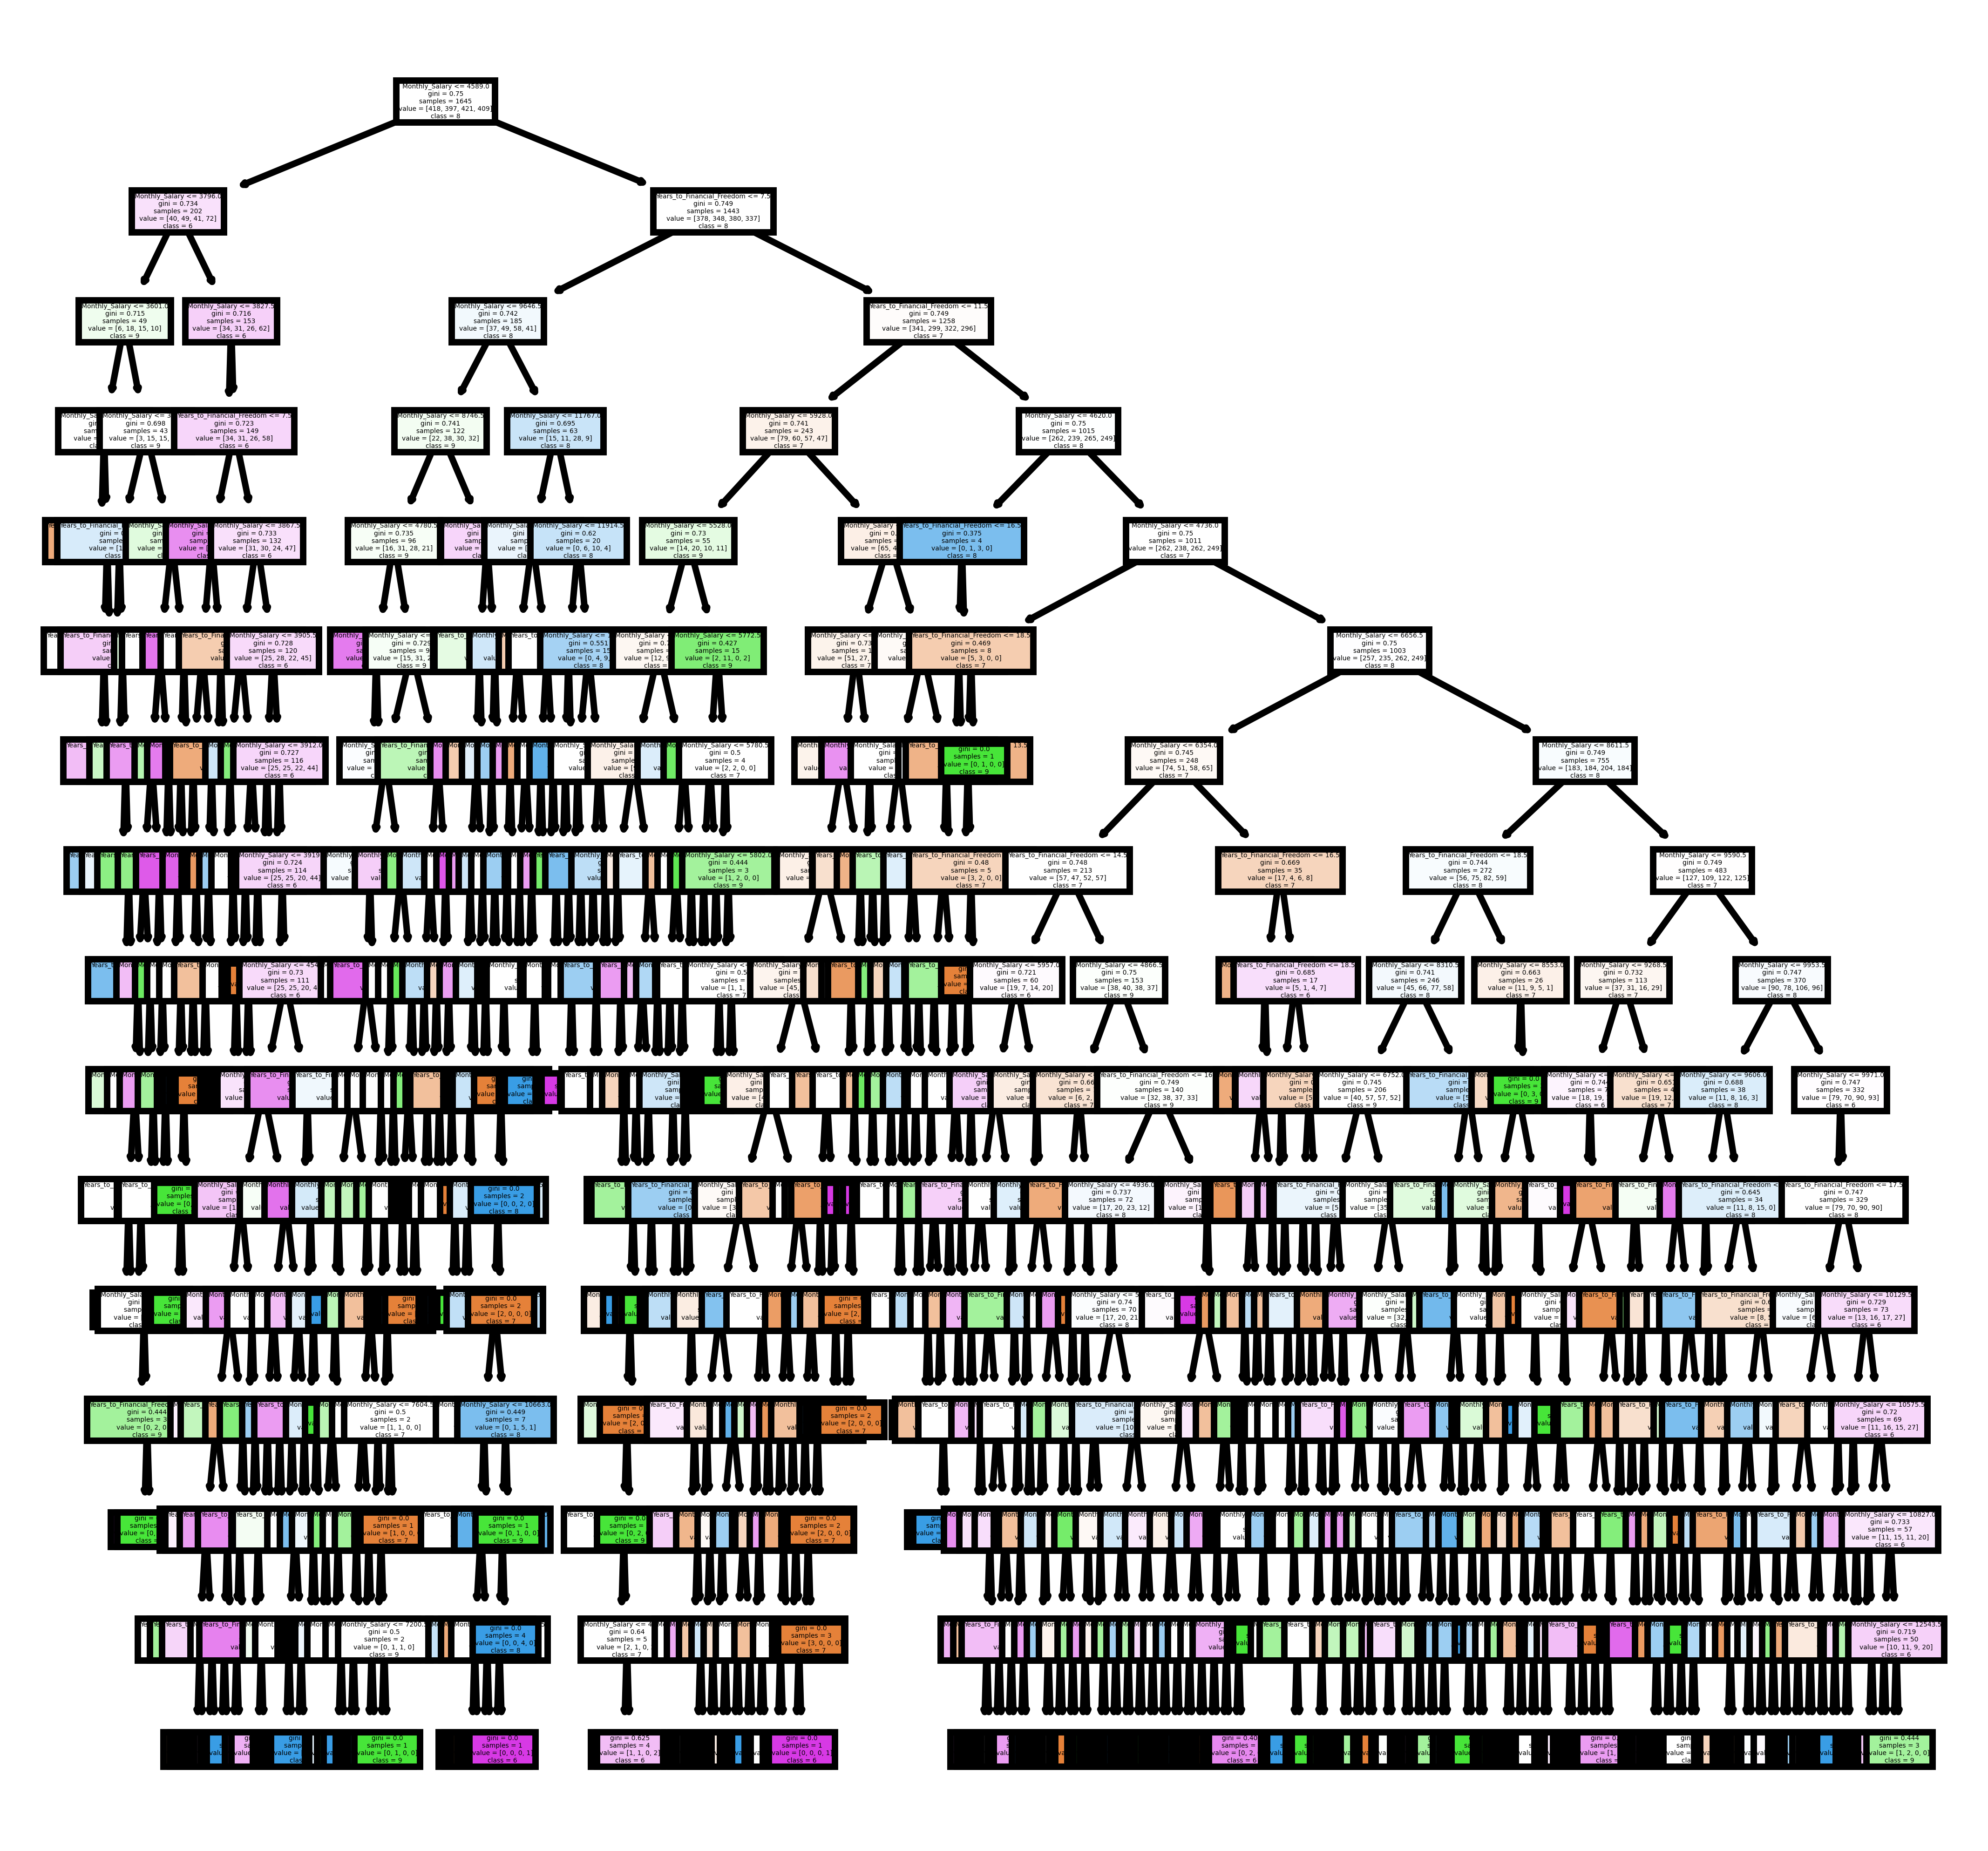

In [48]:
fn = X.columns
cn = ['7','9','8','6']
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5,5), dpi=1000)
tree.plot_tree(clf,
                feature_names=fn,
                class_names=cn,
                filled=True);
fig.savefig('DecisionTree.png')
                

### Compare prediction vs actual value

In [49]:
some_data = X_test.iloc[:300]
predicted_credit_score = clf.predict(some_data)
predicted_credit_score

array([7, 6, 9, 9, 9, 6, 9, 8, 6, 6, 8, 6, 7, 8, 6, 7, 9, 6, 7, 9, 7, 7,
       7, 9, 9, 7, 6, 9, 8, 8, 9, 7, 8, 7, 6, 7, 9, 6, 8, 6, 7, 7, 9, 9,
       8, 8, 6, 8, 6, 8, 6, 7, 8, 8, 9, 8, 8, 7, 9, 6, 7, 8, 9, 8, 6, 7,
       8, 8, 7, 6, 8, 6, 8, 6, 6, 8, 9, 7, 8, 9, 9, 7, 6, 6, 6, 7, 6, 9,
       6, 7, 7, 9, 8, 8, 9, 7, 9, 7, 9, 9, 7, 8, 8, 7, 6, 6, 6, 6, 7, 8,
       6, 7, 6, 9, 6, 9, 8, 9, 9, 6, 9, 9, 6, 6, 8, 9, 9, 6, 7, 7, 8, 7,
       8, 7, 8, 8, 7, 6, 8, 6, 8, 6, 9, 8, 9, 6, 6, 9, 7, 8, 7, 8, 9, 9,
       7, 8, 8, 9, 6, 6, 7, 7, 8, 9, 8, 8, 8, 8, 9, 7, 7, 6, 8, 7, 9, 6,
       7, 9, 7, 8, 6, 9, 8, 8, 8, 7, 6, 6, 6, 7, 6, 8, 6, 8, 9, 7, 9, 8,
       9, 9, 6, 9, 7, 8, 6, 6, 7, 9, 8, 6, 9, 6, 7, 7, 6, 8, 9, 6, 8, 6,
       6, 7, 7, 8, 6, 6, 7, 9, 9, 6, 6, 8, 7, 9, 9, 7, 8, 9, 9, 9, 9, 7,
       7, 8, 6, 7, 7, 8, 6, 7, 8, 6, 7, 7, 7, 7, 7, 9, 7, 7, 9, 9, 6, 8,
       9, 8, 8, 9, 9, 7, 7, 8, 7, 8, 7, 8, 8, 9, 6, 7, 8, 8, 7, 7, 6, 7,
       6, 8, 6, 9, 8, 7, 9, 8, 6, 7, 9, 6, 7, 9], d

In [50]:
actual_credit_score = y_test.iloc[:300].values
actual_credit_score

array([6, 9, 8, 8, 8, 8, 9, 8, 6, 8, 6, 7, 7, 6, 6, 7, 9, 7, 8, 7, 6, 8,
       6, 8, 7, 8, 9, 9, 7, 7, 9, 8, 8, 7, 9, 7, 9, 6, 8, 9, 6, 8, 7, 9,
       7, 7, 8, 8, 7, 8, 7, 9, 9, 8, 7, 6, 8, 8, 6, 7, 6, 9, 7, 6, 8, 7,
       9, 8, 8, 7, 7, 8, 8, 7, 7, 6, 6, 6, 9, 7, 8, 9, 6, 9, 8, 7, 7, 8,
       7, 8, 7, 6, 9, 8, 8, 8, 7, 6, 7, 7, 8, 6, 7, 9, 7, 8, 8, 9, 7, 9,
       8, 7, 8, 9, 7, 6, 8, 6, 7, 7, 6, 7, 8, 9, 9, 9, 7, 7, 8, 7, 6, 6,
       6, 6, 8, 9, 7, 8, 8, 7, 7, 8, 7, 9, 8, 6, 7, 6, 9, 8, 9, 6, 9, 9,
       8, 7, 9, 9, 6, 7, 7, 6, 6, 8, 9, 6, 7, 9, 9, 8, 7, 8, 8, 9, 9, 8,
       7, 9, 6, 7, 7, 7, 7, 7, 6, 9, 7, 8, 7, 8, 8, 9, 6, 7, 6, 8, 6, 8,
       9, 8, 6, 6, 9, 9, 6, 9, 9, 9, 6, 7, 7, 6, 6, 7, 6, 6, 8, 9, 6, 9,
       8, 8, 8, 7, 8, 9, 8, 7, 8, 6, 7, 7, 9, 7, 7, 6, 7, 8, 7, 6, 8, 8,
       9, 8, 7, 8, 7, 6, 9, 9, 6, 9, 8, 6, 9, 8, 8, 7, 9, 7, 8, 6, 8, 6,
       8, 7, 7, 9, 7, 8, 9, 9, 9, 9, 6, 9, 6, 8, 8, 7, 6, 6, 9, 6, 6, 8,
       7, 8, 7, 7, 6, 7, 8, 7, 6, 6, 8, 9, 8, 6], d

### Save predicted output in a different dataframe and save results in csv file

In [51]:
cols = ['Years_to_Financial_Freedom', 'Monthly_Salary','Score']
new_df = df[cols].iloc[:300]
new_df['Predicted_Score'] = predicted_credit_score
new_df['Score'] = actual_credit_score
new_df

new_df.columns = ['Years to Financial Freedom','Monthly Salary','Score','Predicted Score']
new_df.to_csv('Decision_Tree_results.csv', index=False)

In [52]:
new_df

,Years to Financial Freedom,Monthly Salary,Score,Predicted Score
0,5,12262,6,7
1,5,9251,9,6
2,5,4919,8,9
3,5,4459,8,9
4,5,5628,8,9
...,...,...,...,...
295,7,6580,6,7
296,7,12463,8,9
297,7,10107,9,6
298,7,6705,8,7


### Recommendation and Conclusion

* Based on the result of the DecisionTree. We conclude that the larger the 'depth' of the tree, the higher accuracy that it provide. However, it takes longer time to load and reading the graph is almost impossible. We recommend to find the 'sweet spot' of the tree where the load time is fast and the accuracy is high to be most optimal solution when it comes to Decision Tree